# Reducing Pricing Errors in Cars Valuation Using Market Anomaly Detection

# A. Introduction

## 1. Background

Valuing used cars accurately is a complex task that plays a crucial role in the automotive market. Incorrect pricing can lead to significant financial losses, both for dealers and consumers. The traditional methods of car valuation rely heavily on historical data, which may not account for current market conditions or anomalies that can distort prices. With the advent of big data and machine learning, it is possible to analyze vast amounts of market data to detect and correct pricing errors. This project explores the application of market anomaly detection techniques to reduce pricing errors in car valuation, ultimately leading to more accurate and fair pricing for all stakeholders.

## 2. Problem Statement

1. **Inaccurate Pricing Due to Market Anomalies:**
   - Car prices are often affected by market anomalies, such as sudden shifts in supply and demand or regional economic changes, leading to inaccurate valuations.

2. **Dependence on Outdated Valuation Methods:**
   - Many car dealerships and pricing platforms still rely on outdated valuation models that do not incorporate real-time data, resulting in pricing errors that can affect profitability.

3. **Lack of Automated Detection Mechanisms:**
   - There is a lack of automated systems to detect and correct anomalies in car valuation, leading to human errors and inconsistent pricing across the market.

4. **Difficulty in Identifying True Market Value:**
   - The true market value of a car is often obscured by pricing anomalies, making it difficult for consumers and dealers to make informed decisions.

5. **Financial Risks for Stakeholders:**
   - Inaccurate car valuations pose financial risks for buyers, sellers, and dealers, leading to potential losses or unfair transactions.


## 3. Objectives



1. **Identify Anomalous Pricing Patterns:**
   - To detect unusual or anomalous pricing patterns in the car market that may indicate errors in valuation.

2. **Improve Pricing Accuracy:**
   - To enhance the accuracy of car pricing by identifying and correcting valuation errors through anomaly detection.

3. **Enhance Market Valuation Models:**
   - To develop better market valuation models by incorporating anomaly data as a corrective factor to reduce bias and errors.

4. **Provide Insights for Decision-Making:**
   - To provide actionable insights for car dealers, buyers, and sellers, enabling more informed pricing decisions based on corrected market data.

5. **Minimize Financial Risks:**
   - To reduce financial risks associated with pricing errors by detecting and correcting anomalies before trang financial risks.

# B. Import Dataset

In [619]:
import pandas as pd

df = pd.read_csv("D:/Data science/Dataset/Car Price With MMR Data/Car Price With MMR Data.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# C. Data Understanding

## 1. Check Dataset Dimension

In [622]:
#Check the dimension of the data
df.shape

(558837, 16)

## 2. Summary the Data

In [624]:
#Create a function to summary the data
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['data type'])
    summry['missing'] = df.isnull().sum().values
    summry['Duplicate'] = df.duplicated().sum()
    summry['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summry['min'] = desc['min'].values
    summry['max'] = desc['max'].values
    summry['avg'] = desc['mean'].values
    summry['std dev'] = desc['std'].values
    summry['top value'] = desc['top'].values
    summry['Freq'] = desc['freq'].values

    return summry

summary(df).style.set_caption("**Summary Data**").\
background_gradient(cmap='Pastel2_r', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

,data type,missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
year,int64,0,0,34,1982.000000,2015.000000,2010.038927,3.966864,nan,nan
make,object,10301,0,96,nan,nan,nan,nan,Ford,93554
model,object,10399,0,973,nan,nan,nan,nan,Altima,19349
trim,object,10651,0,1963,nan,nan,nan,nan,Base,55817
body,object,13195,0,87,nan,nan,nan,nan,Sedan,199437
transmission,object,65352,0,4,nan,nan,nan,nan,automatic,475915
vin,object,4,0,550297,nan,nan,nan,nan,automatic,22
state,object,0,0,64,nan,nan,nan,nan,fl,82945
condition,float64,11820,0,41,1.000000,49.000000,30.672365,13.402832,nan,nan
odometer,float64,94,0,172278,1.000000,999999.000000,68320.017767,53398.542821,nan,nan


In [625]:
pd.set_option("display.max_colwidth", None)

pd.DataFrame({
    "Columns":df.columns.values,
    'Data Type':df.dtypes.values,
    'Num of Null':df.isnull().sum()/len(df)*100,
    'Negative': [True if df[i].dtype == int and (df[i] < 0).any else False for
                 i in df.columns],
    'Num of unique':df.nunique().values,
    'Sample Unique': [df[i].unique() for i in df.columns]
})

,Columns,Data Type,Num of Null,Negative,Num of unique,Sample Unique
year,year,int64,0.000000,False,34,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987, 1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982, 1983]"
make,make,object,1.843292,False,96,"[Kia, BMW, Volvo, Nissan, Chevrolet, Audi, Ford, Hyundai, Buick, Cadillac, Acura, Lexus, Infiniti, Jeep, Mercedes-Benz, Mitsubishi, Mazda, MINI, Land Rover, Lincoln, lincoln, Jaguar, Volkswagen, Toyota, Subaru, Scion, Porsche, nan, bmw, Dodge, FIAT, Chrysler, ford, Ferrari, Honda, GMC, mitsubishi, Ram, smart, chevrolet, Bentley, chrysler, pontiac, Pontiac, Saturn, Maserati, Mercury, HUMMER, landrover, cadillac, land rover, mercedes, mazda, toyota, lexus, gmc truck, honda, nissan, porsche, Saab, Suzuki, dodge, subaru, Oldsmobile, oldsmobile, hyundai, jeep, Isuzu, dodge tk, Geo, acura, volkswagen, suzuki, kia, audi, Rolls-Royce, gmc, maserati, mazda tk, mercury, buick, hyundai tk, mercedes-b, vw, Daewoo, chev truck, ford tk, plymouth, Plymouth, ford truck, Tesla, airstream, dot, Aston Martin, Fisker, Lamborghini, Lotus]"
model,model,object,1.860829,False,973,"[Sorento, 3 Series, S60, 6 Series Gran Coupe, Altima, M5, Cruze, A4, Camaro, A6, Optima, Fusion, Sonata, Q5, 6 Series, Impala, 5 Series, A3, XC70, X5, SQ5, S5, Verano, Suburban, ELR, V60, X6, ILX, K900, Malibu, RX 350, Versa, Elantra, Versa Note, A8, X1, nan, Enclave, TTS, 4 Series, Silverado 2500HD, MDX, Silverado 1500, SRX, G Coupe, G Sedan, FX, Santa Fe, Genesis, Equus, Sonata Hybrid, Accent, Veloster, Elantra Coupe, Azera, Tucson, Genesis Coupe, Wrangler, S-Class, GS 350, Outlander, C-Class, Mazda2, Rio, M, 370Z, Soul, Outlander Sport, SLK-Class, ES 350, E-Class, Mazda3, Cooper Clubman, Cooper, CX-9, Forte, Compass, JX, RX 450h, LR4, Mazda5, Range Rover Evoque, LS 460, GLK-Class, Sportage, Grand Cherokee, MKX, mkt, XF, GL-Class, M-Class, Cooper Countryman, Lancer, Range Rover Sport, Passat, Corolla, XC60, Sienna, Juke, Yaris, ...]"
trim,trim,object,1.905922,False,1963,"[LX, 328i SULEV, T5, 650i, 2.5 S, Base, 1LT, 2.0T Premium Plus quattro, LT, 3.0T Prestige quattro, SE, 2LT, LS, LTZ, 528i, 1.8 TFSI Premium, T6, sDrive35i, 3.0T Premium Plus quattro, Premium Plus quattro, Convenience Group, xDrive35i, Technology Package, Luxury, 1.6 SL, 1.6 SV, L 3.0T quattro, sDrive28i, 750Li, Leather Group, quattro, 428i SULEV, Work Truck, Advance and Entertainment Packages, 535d, G37 Sport, G37 Journey, FX37, Limited, 5.0 R-Spec, Signature, GLS, Sport, Sport 2.0T, Turbo, GS, Ultimate, 3.8, 3.8 Track, Unlimited Rubicon, EX Hybrid, 2.5, S550, C250, SX, Unlimited Sahara, C250 Sport, Touring, M37, +, LE, SLK350, E350 Sport, i SV, Latitude, i Touring, JX35, G37x, HSE LUX, EX, i Sport, Pure Plus, L, GLK350, Unlimited Sport, E350 Sport BlueTEC, Pure, awd v6, GL450 4MATIC, ML350, Pure Premium, Ralliart, C63 AMG, Supercharged Limited Edition, E350, ES, SE PZEV, 3.2, LE 7-Passenger Mobility Auto Access, S, SR, 1500 S, R-Line PZEV, SL, XLE, PreRunner, 3.5 SL, 1.6 S Plus, 2.5L PZEV, Wolfsburg Edition PZEV, ...]"
body,body,object,2.361154,False,87,"[SUV, Sedan, Convertible, Coupe, Wagon, Hatchback, Crew Cab, G Coupe, G Sedan, Elantra Coupe, Genesis Coupe, Minivan, nan, Van, Double Cab, CrewMax Cab, Access Cab, King Cab, SuperCrew, CTS Coupe, Extended Cab, E-Series Van, SuperCab, Regular Cab, G Convertible, Koup, Quad Cab, CTS-V Coupe, sedan, G37 Convertible, Club Cab, Xtracab, Q60 Convertible, CTS Wagon, convertible, G37 Coupe, Mega Cab, Cab Plus 4, Q60 Coupe, Cab Plus, Beetle Convertible, TSX Sport Wagon, Promaster Cargo Van, GranTurismo Convertible, CTS-V Wagon, Ram Van, minivan, suv, Transit Van, Navitgation, van, regular-cab, g sedan, g coupe, hatchback, king cab, supercrew, g convertible, coupe, crew cab, wagon, double cab, e-series van, regular cab, quad cab, g37 convertible, supercab, extended cab, crewmax cab, genesis coupe, access cab, mega cab, xtrac

## 3. Column Description

Here is the description of the column:--

**year:** The year the vehicle was manufactured. This indicates when the vehicle was produced, which is important for assessing its age and relevance to current models.

**make:** The brand of the vehicle. It refers to the manufacturer, such as Toyota, Ford, Honda, etc.

**model:** The specific model of the vehicle within the brand, such as Corolla, Mustang, Civic, etc.

**trim:** The version or variant of the vehicle model. It usually refers to specific features or specifications, like LX, EX, Sport, etc.

**body:** The body type of the vehicle, such as sedan, SUV, truck, hatchback, etc. This gives an idea of the physical shape and primary function of the vehicle.

**transmission:** The type of transmission used by the vehicle, such as manual, automatic, or CVT (Continuously Variable Transmission).

**vin:** Vehicle Identification Number, a unique number used to individually identify the vehicle. The VIN serves as the vehicle's unique identity, similar to a serial number.

**state:** The state or region where the vehicle is registered or sold. This can be useful for geographic analysis or specific regulations in a given area.

**condition:** The condition of the vehicle, such as 'new', 'used', or possibly a numeric rating to assess the vehicle's condition in more detail.

**odometer:** The mileage the vehicle has accumulated, typically measured in miles or kilometers. This helps assess how much the vehicle has been used.

**color:** The exterior color of the vehicle.

**interior:** The color or material of the vehicle's interior, such as 'black leather', 'gray fabric', etc.

**seller:** The entity selling the vehicle, which could be a dealer, individual, or company.

**mmr:** Manheim Market Report, an estimated market value of the vehicle based on previous sales data. This is commonly used in the automotive industry to assess the value of vehicles.

**sellingprice:** The actual selling price of the vehicle.

**saledate:** The date when the vehicle was sold. This is important for time-based analysis, suiptions of each column in the dataset.

# D. Data Preparation

## 1. Rename & Drop the Columns

In [630]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [631]:
#Rename the columns
df.rename(columns={'make':'brand', 'odometer':'mileage', 'color':'color_exterior',
                  'interior':'color_interior'}, inplace=True)

#Drop unused column
df.drop('vin', axis=1, inplace=True)

## 2. Handling Null Valuess

In [633]:
cat_null = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]
num_null = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isnull().any()]

In [634]:
cat_null

Index(['brand', 'model', 'trim', 'body', 'transmission', 'color_exterior',
       'color_interior', 'saledate'],
      dtype='object')

In [635]:
num_null

Index(['condition', 'mileage', 'mmr', 'sellingprice'], dtype='object')

In [636]:
for i in num_null:
    df[i].fillna(df[i].median(), inplace=True)

In [637]:
df[num_null].isnull().sum()

condition       0
mileage         0
mmr             0
sellingprice    0
dtype: int64

In [638]:
import warnings
warnings.filterwarnings("ignore")

df['color_exterior'].fillna(df['color_exterior'].mode()[0], inplace=True)
df['color_interior'].fillna(df['color_interior'].mode()[0], inplace=True)
df['saledate'].fillna(df['saledate'].mode()[0], inplace=True)

In [639]:
print("Dataset before removing null values:", df.shape)
df = df.dropna(subset=['brand', 'model', 'trim', 'body', 'transmission'], axis=0)
print("Dataset after removing null values:", df.shape)

Dataset before removing null values: (558837, 15)
Dataset after removing null values: (482361, 15)


## 3. Adjust data type

In [641]:
df['saledate'] = df['saledate'].str.replace(r' GMT[^\s]+ \(.*\)', '', regex=True)

# Konversi kolom 'saledate' ke datetime tanpa informasi zona waktu
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S', errors='coerce')

# Periksa hasil dan tipe data
print(df['saledate'].dtype)  # Harusnya datetime64[ns]

datetime64[ns]


In [642]:
df['saledate'] = df['saledate'].dt.normalize()

In [643]:
df.dropna(inplace=True)
df.isnull().sum()

year              0
brand             0
model             0
trim              0
body              0
transmission      0
state             0
condition         0
mileage           0
color_exterior    0
color_interior    0
seller            0
mmr               0
sellingprice      0
saledate          0
dtype: int64

## 4. Feature Engineering

In [661]:
df['car_age'] = np.abs(2024 - df['year'])
df['price_difference'] = np.abs(df['mmr'] - df['sellingprice'])

# E. Exploratory Data Analysis (EDA)

In [520]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Analyzing Category

In [548]:
def top_10(column):
    data = df.groupby(column).size().reset_index(name=
        'count').sort_values(by='count', ascending=False).head(10)
    ax = sns.barplot(data, x='count', y=column, palette='viridis')
    plt.title(f'Top 10 Car {column} Sold')
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', 
                    xytext=(5, 0), 
                    textcoords='offset points')
    plt.show()

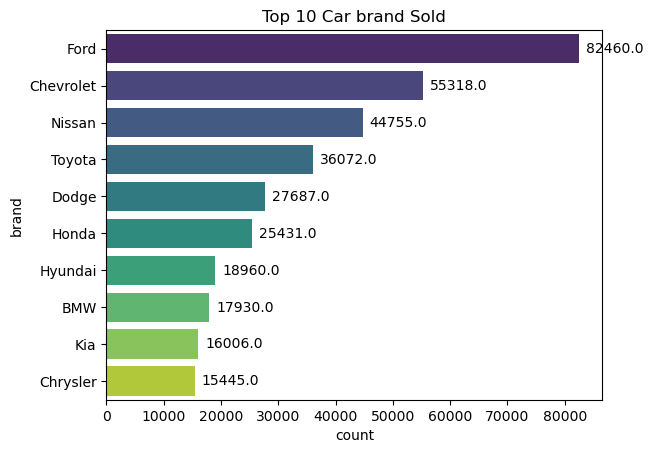

In [550]:
top_10('brand')

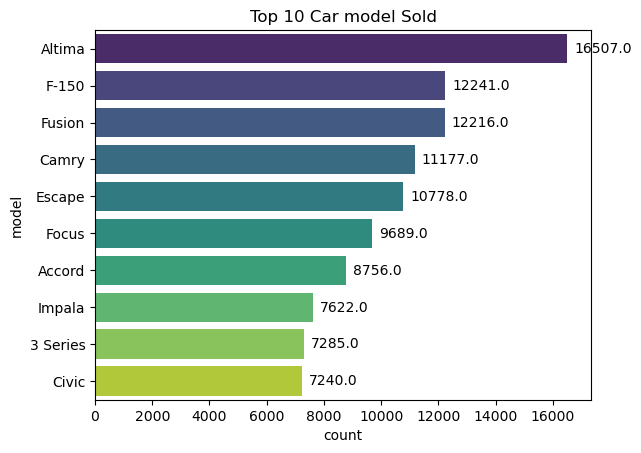

In [552]:
top_10('model')

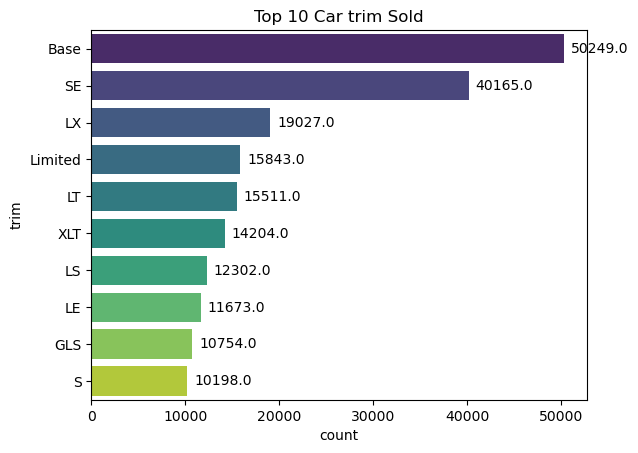

In [554]:
top_10('trim')

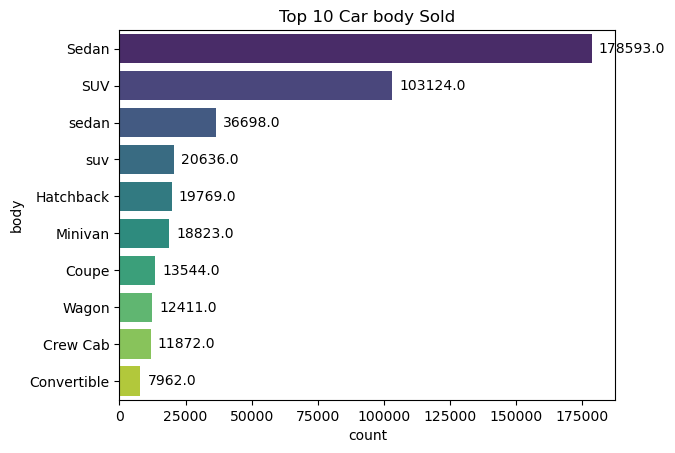

In [556]:
top_10('body')

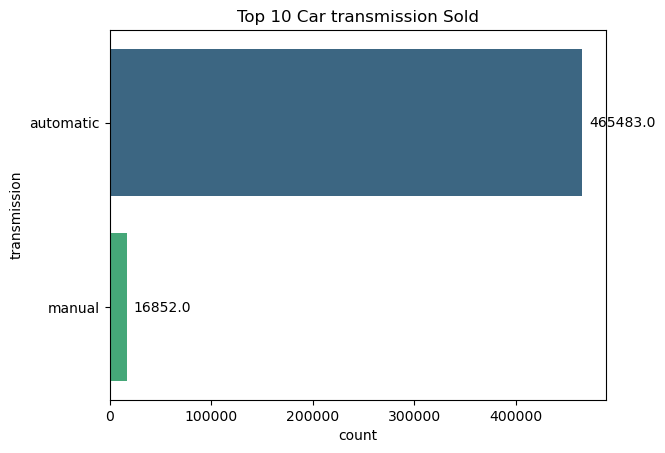

In [558]:
top_10('transmission')

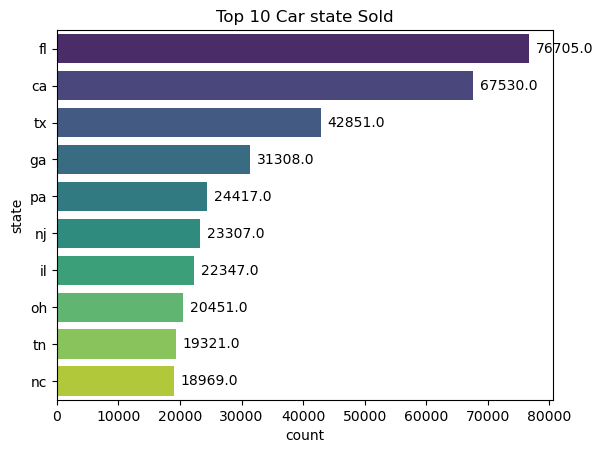

In [560]:
top_10('state')

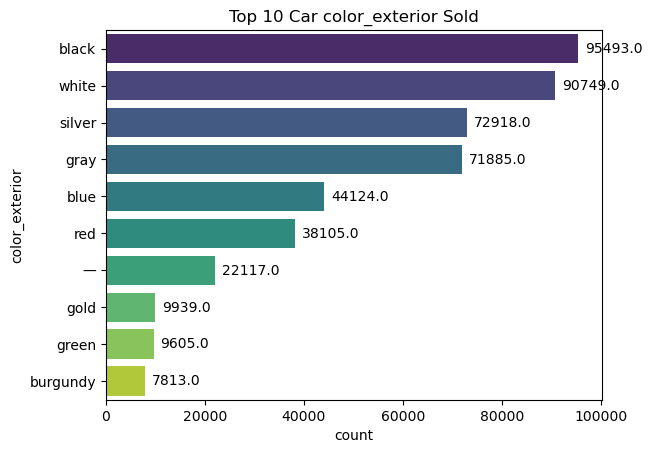

In [562]:
top_10('color_exterior')

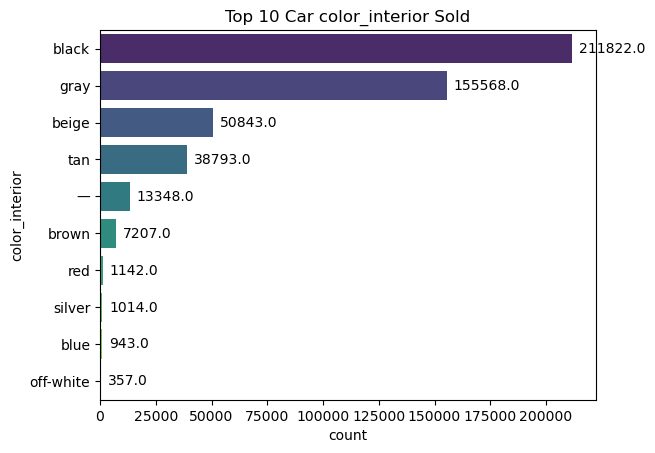

In [564]:
top_10('color_interior')

## 2. Analyzing Outliers

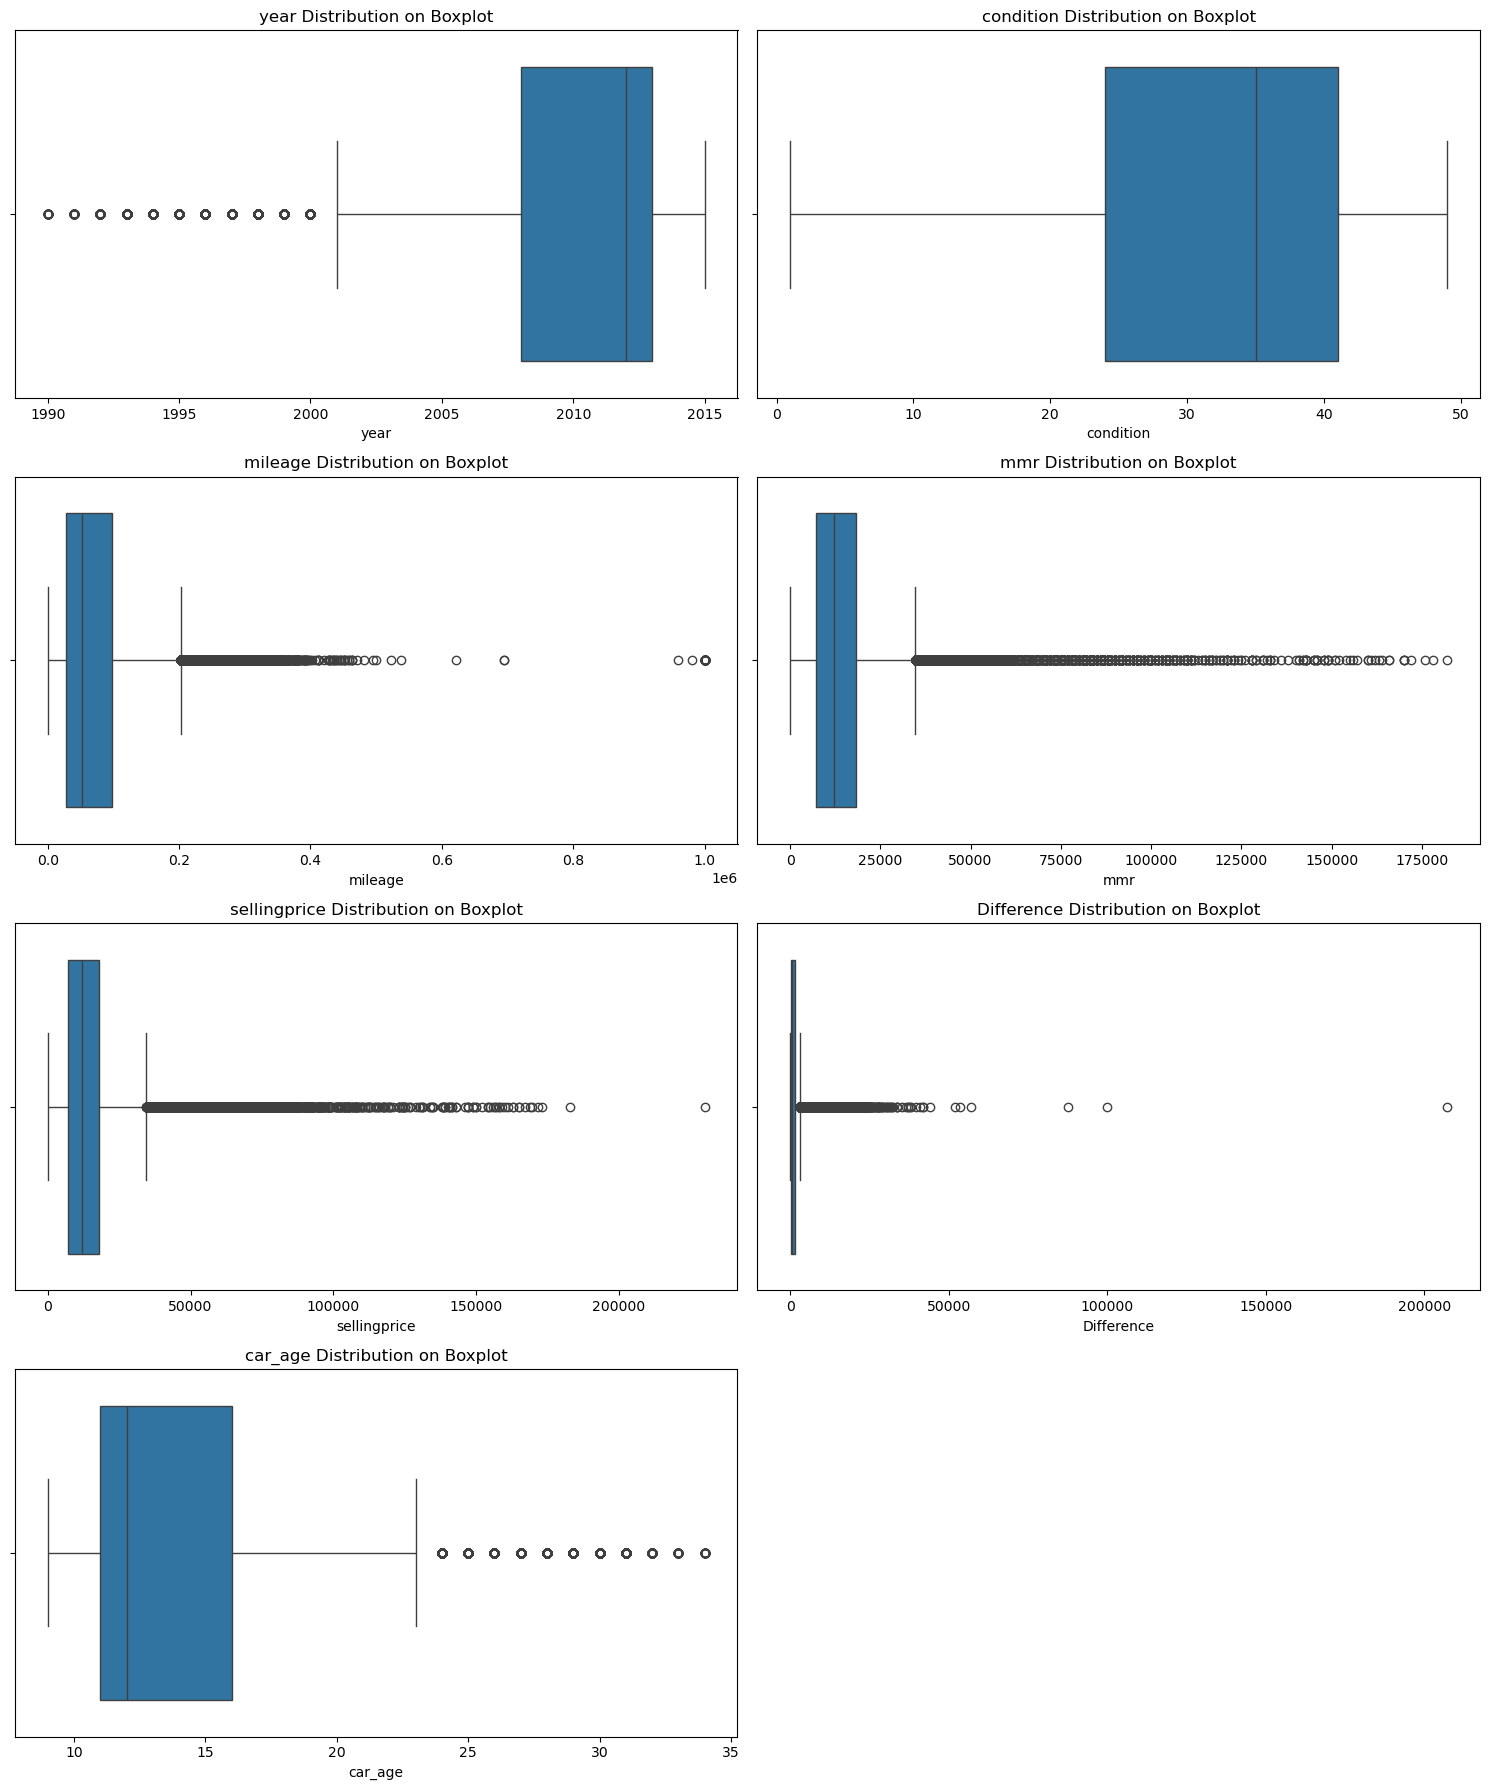

In [604]:
num_cols = len(num)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(4,2, figsize=(15,18))
axs = axs.flatten()

def boxplot(column, ax):
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f'{column} Distribution on Boxplot')

for i, column in enumerate(num):
    boxplot(column, axs[i])

for j in range(len(num), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout() 
plt.show()

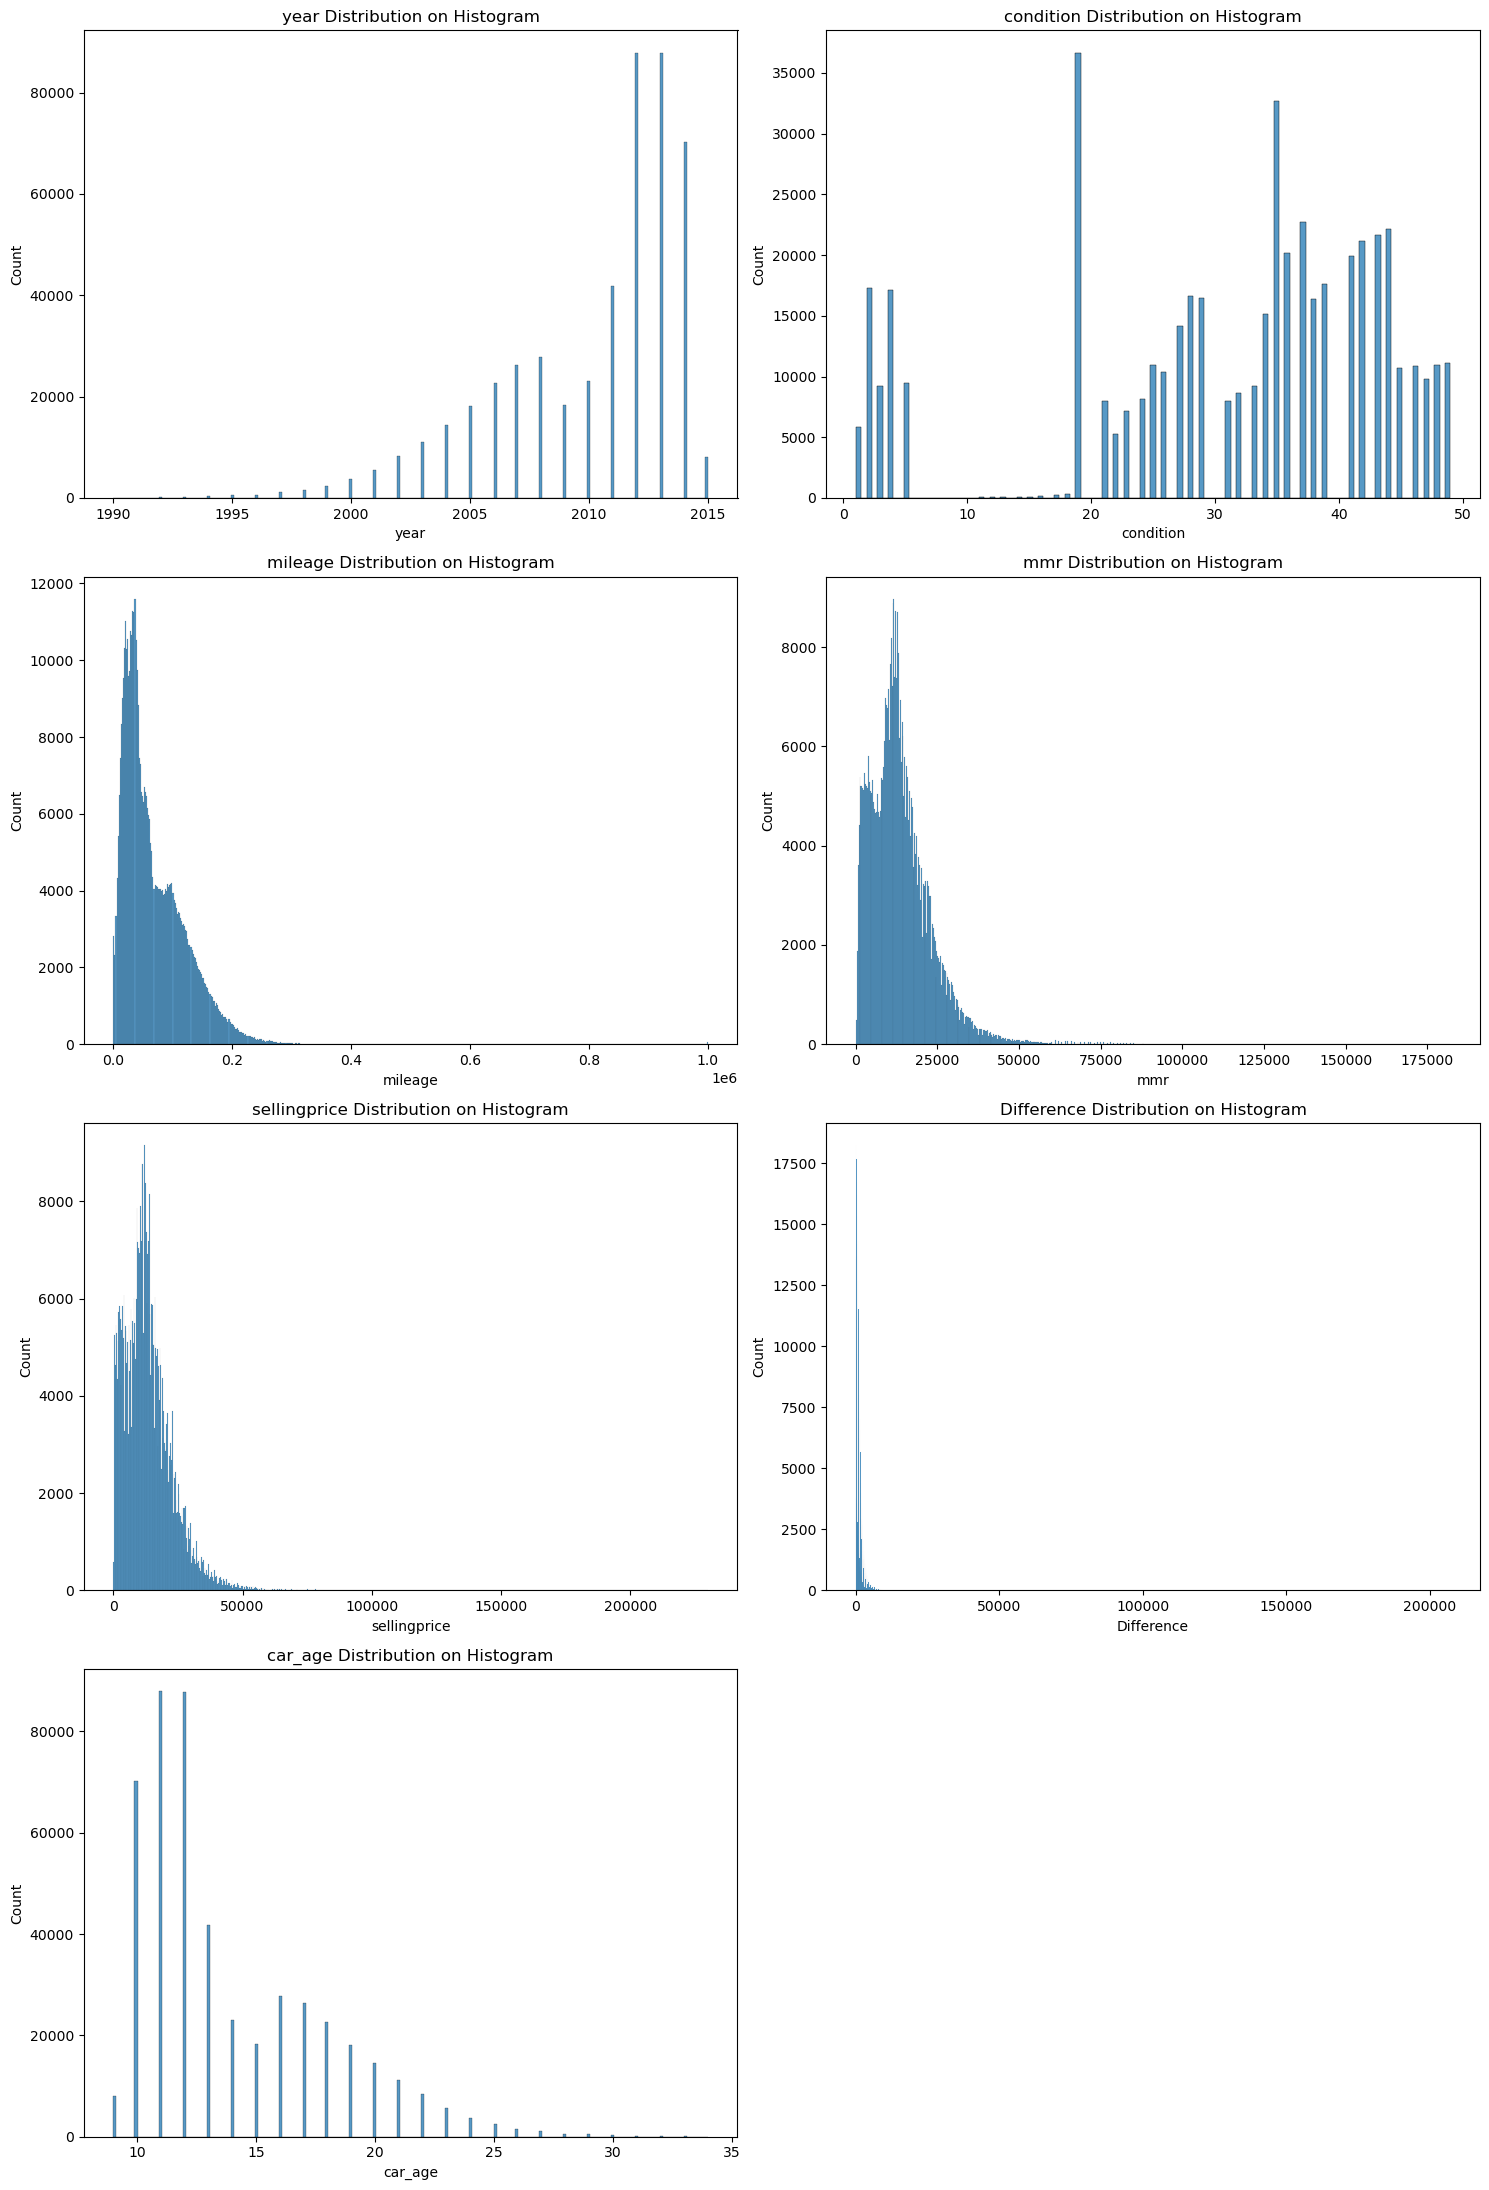

In [607]:
num_cols = len(num)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(4,2, figsize=(15,22))
axs = axs.flatten()

def boxplot(column, ax):
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_title(f'{column} Distribution on Histogram')

for i, column in enumerate(num):
    boxplot(column, axs[i])

for j in range(len(num), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout() 
plt.show()

## 3. Analyzing Outliers Based on Category

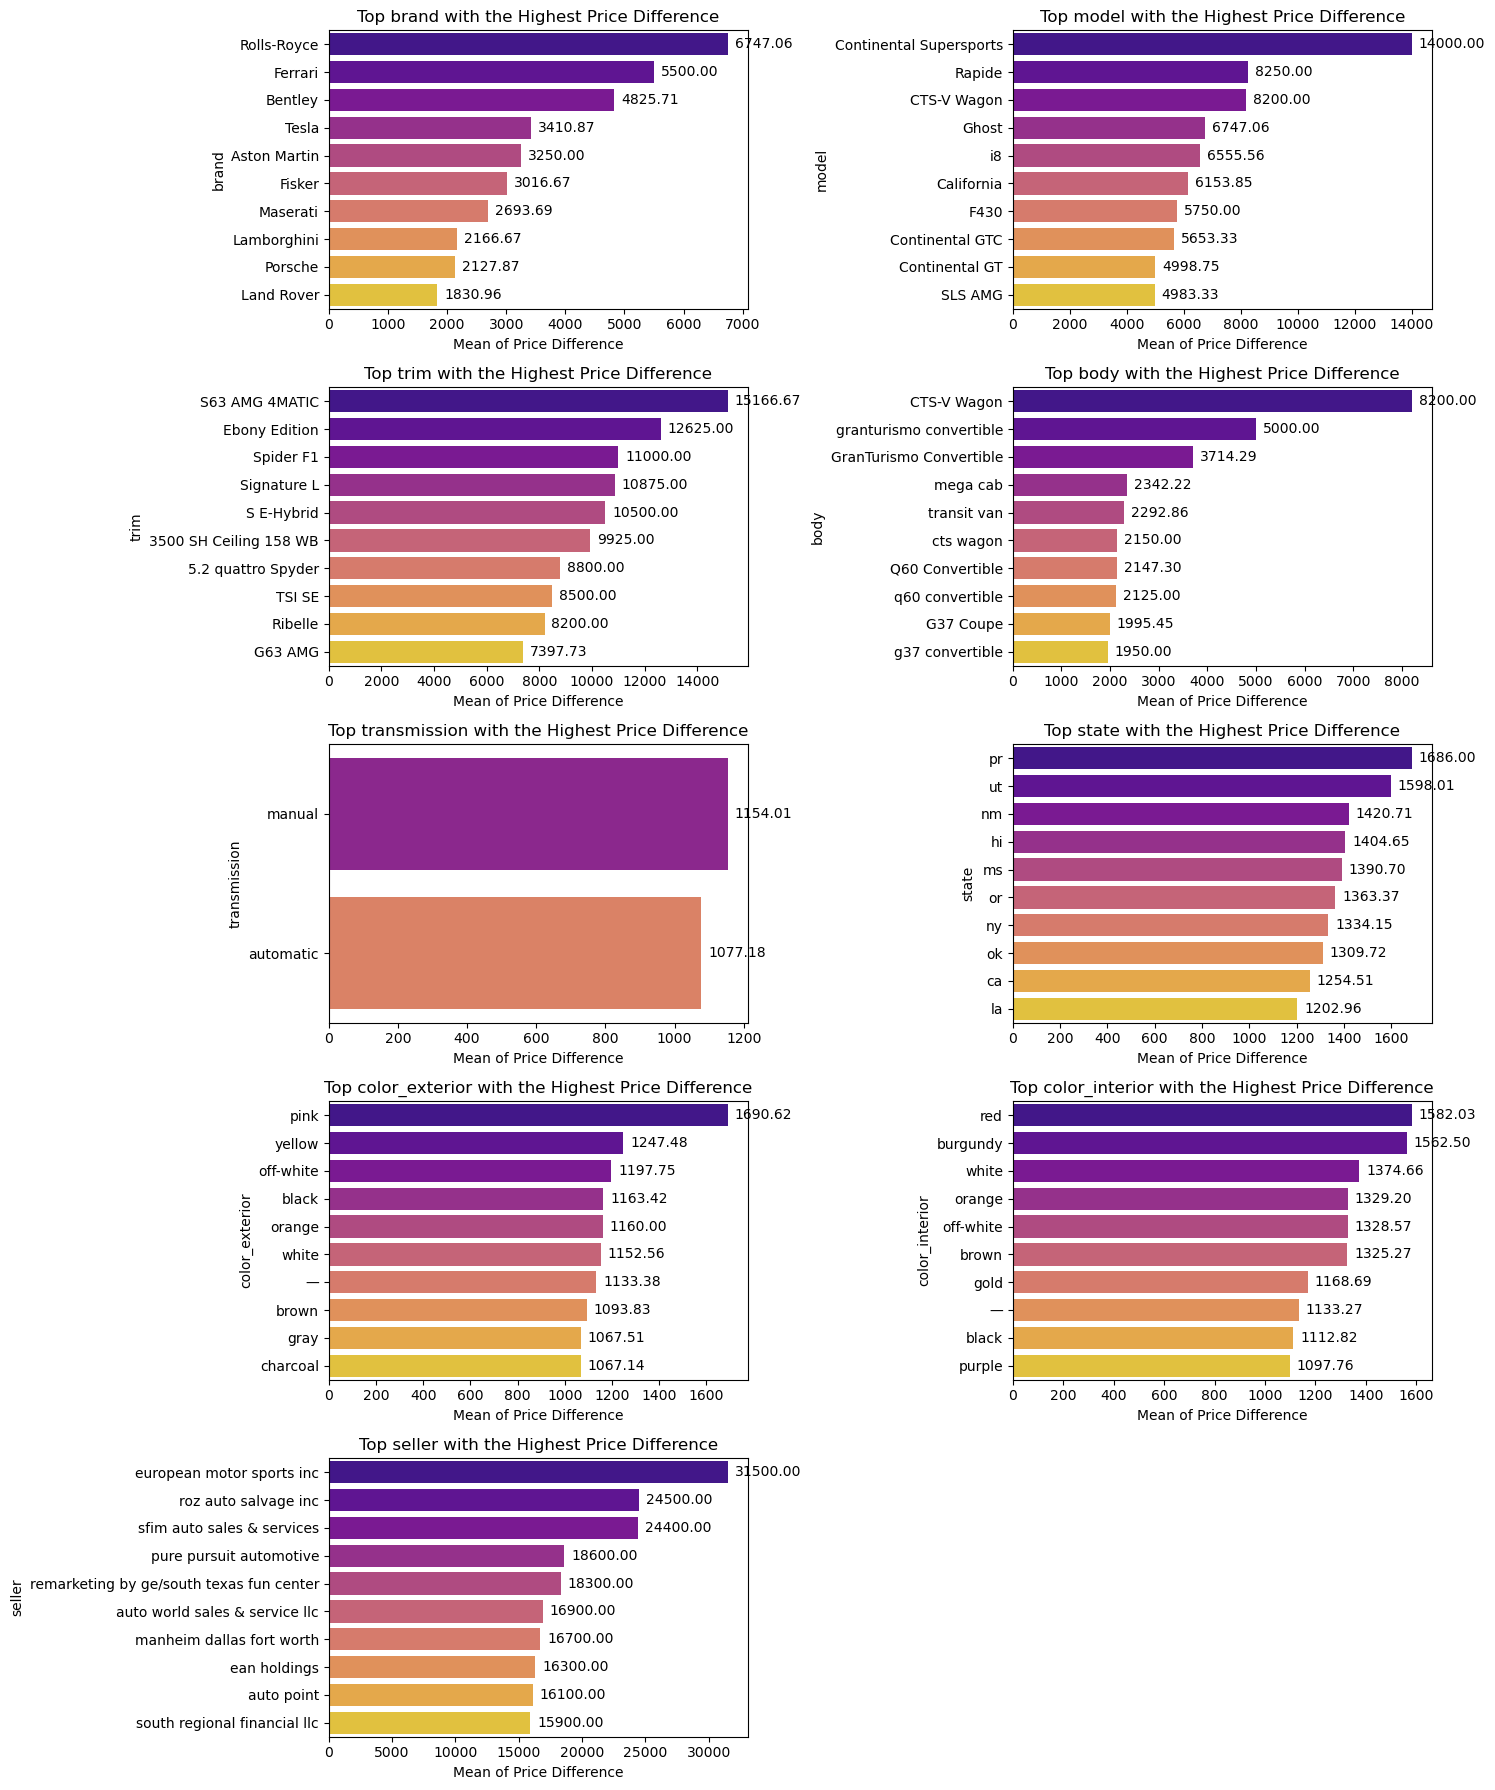

In [689]:
cat = df.select_dtypes(include='object').columns.tolist()

def outlier_by(column, ax):
    data = df.groupby(column)['price_difference'].mean().reset_index(name='Mean of Price Difference')
    data = data.sort_values(by='Mean of Price Difference', ascending=False).head(10)
    
    a = sns.barplot(data=data, x='Mean of Price Difference', y=column, ax=ax, palette='plasma')
    
    for p in a.patches:
        a.annotate(f'{p.get_width():.2f}', 
                   (p.get_width(), p.get_y() + p.get_height() / 2), 
                   ha='left', va='center', 
                   xytext=(5, 0), 
                   textcoords='offset points')
    
    ax.set_title(f"Top {column} with the Highest Price Difference")

num_cols = len(cat)
num_rows = (num_cols + 1) // 2  
fig, axs = plt.subplots(num_rows, 2, figsize=(15,18))
axs = axs.flatten()

for i, column in enumerate(cat):
    outlier_by(column, axs[i])

for j in range(len(cat), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  
plt.show()